**Fyzická kondice**

In [1]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
import numpy
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pandas.read_csv("bodyPerformance.csv")
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:



X = data.drop(columns=["class", "sit and bend forward_cm", "sit-ups counts", "broad jump_cm"])
y = data["class"]

X = pandas.get_dummies(X, drop_first=True)



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


***Rozhodovací strom***

In [6]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


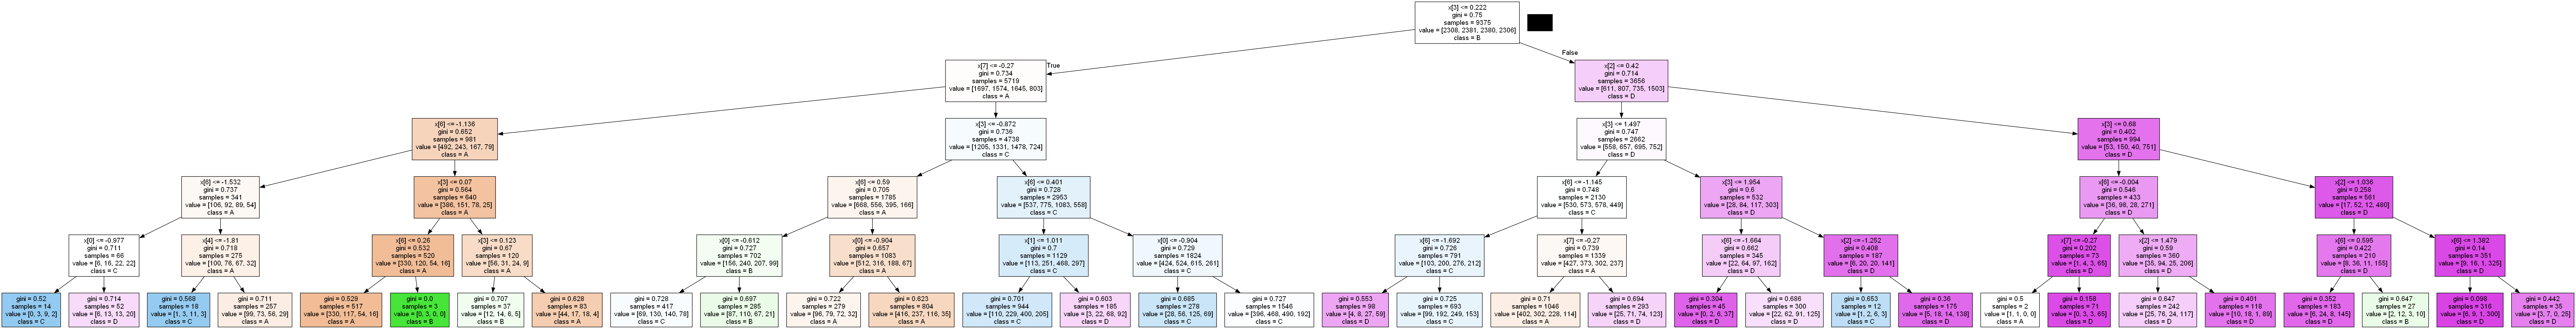

In [7]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, class_names=["A", "B", "C", "D"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


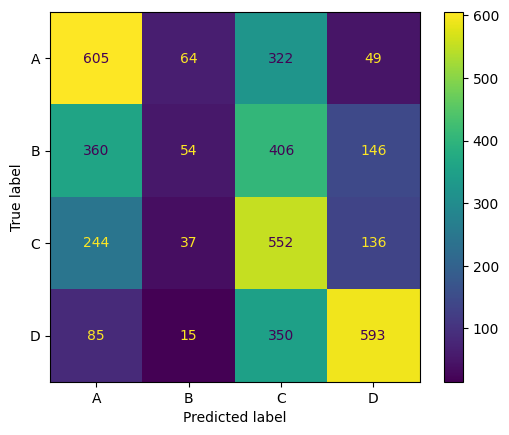

In [8]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

* skupina A - správně zařazeno 605
* skupina B - správně zařazeno 54
* skupina C - správně zařazeno 552
* skupina D - správně zařazeno - 593

In [9]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4489795918367347

***KNeighbors***

In [10]:
X1 = data.drop(columns=["class", "sit and bend forward_cm", "sit-ups counts", "broad jump_cm"])
y1 = data["class"]

X1 = pandas.get_dummies(X1, drop_first=True)
X1 = scaler.fit_transform(X1)

In [11]:
model_1 = KNeighborsClassifier()
param_1 = {"n_neighbors": range(1,31,2)}
clf_1 = GridSearchCV(model_1, param_1, scoring="accuracy")
clf_1.fit(X1,y1)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31, 2)}, scoring='accuracy')

In [12]:
clf_1.best_params_


{'n_neighbors': 29}

In [13]:
clf_1.best_score_

0.44978655941810575

KNeighbors má o chlup lepší accuracy.

***Přidání cviku(sit-ups)***

In [14]:


X2 = data.drop(columns=["class", "sit and bend forward_cm", "broad jump_cm"])
y2 = data["class"]

X2 = pandas.get_dummies(X2, drop_first=True)
X2 = scaler.fit_transform(X2)

In [15]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.3, random_state= 42)


In [17]:
clf2 = DecisionTreeClassifier(max_depth=5)
clf2 = clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)

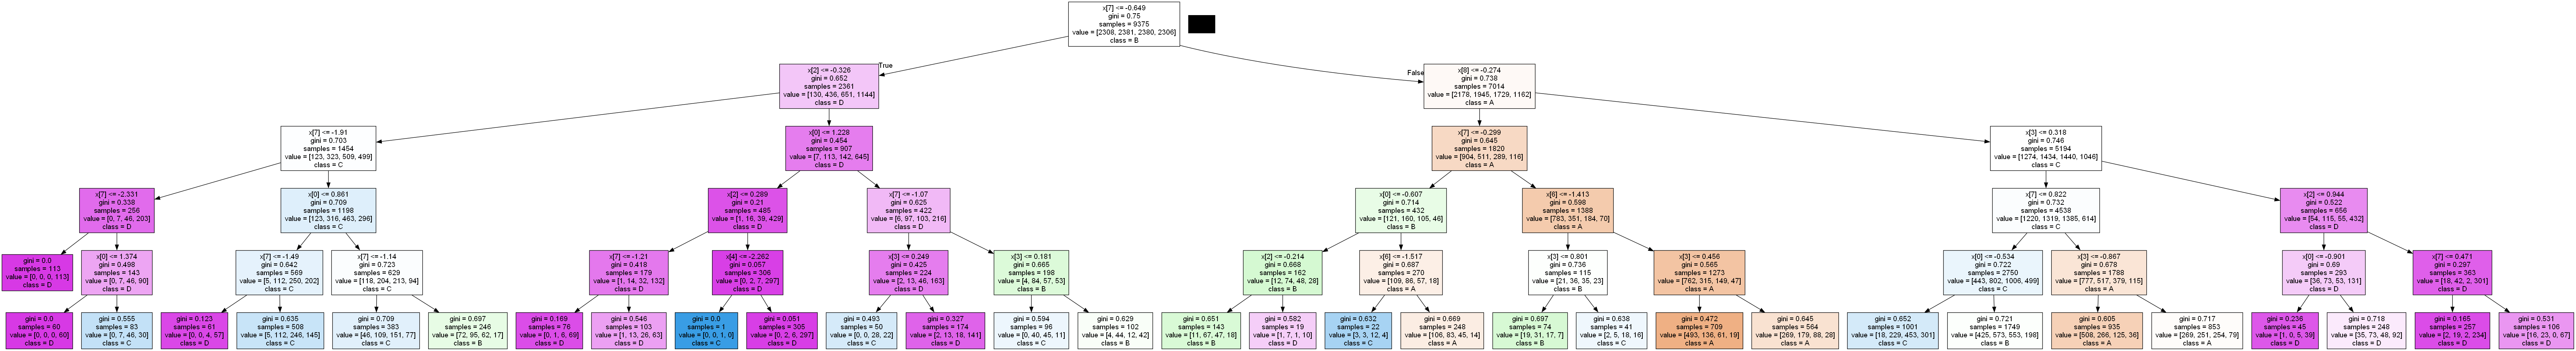

In [18]:
dot_data = StringIO()
export_graphviz(clf2, out_file = dot_data, filled = True, class_names=["A", "B", "C", "D"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [19]:
accuracy2 = accuracy_score(y2_test, y2_pred)
accuracy2

0.5027376804380289

In [21]:
model_2 = KNeighborsClassifier()
param_2 = {"n_neighbors": range(1,31,2)}
clf_3 = GridSearchCV(model_2, param_2, scoring="accuracy")
clf_3.fit(X2,y2)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31, 2)}, scoring='accuracy')

In [22]:
clf_3.best_params_


{'n_neighbors': 27}

In [23]:
clf_3.best_score_


0.5341593022487574

Přidáním cviku se accuracy u obou algoritmů zvětšila. KNeighbors má lepší accuracy (cca 2-5%)